# Heart Disease Prediction

## Importing the dataset

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 1. Pre-processing

## Check for null values

In [2]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no null values so we don't have to deal with the issue of missing values.

In [3]:
df.nunique(axis=0)

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Her I am checking certain properties of the dataset including the number of unique attribute values and other descriptions such as the minimum and maximum values.

## Visualize attribute distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A30E8D790>,
      dtype=object)

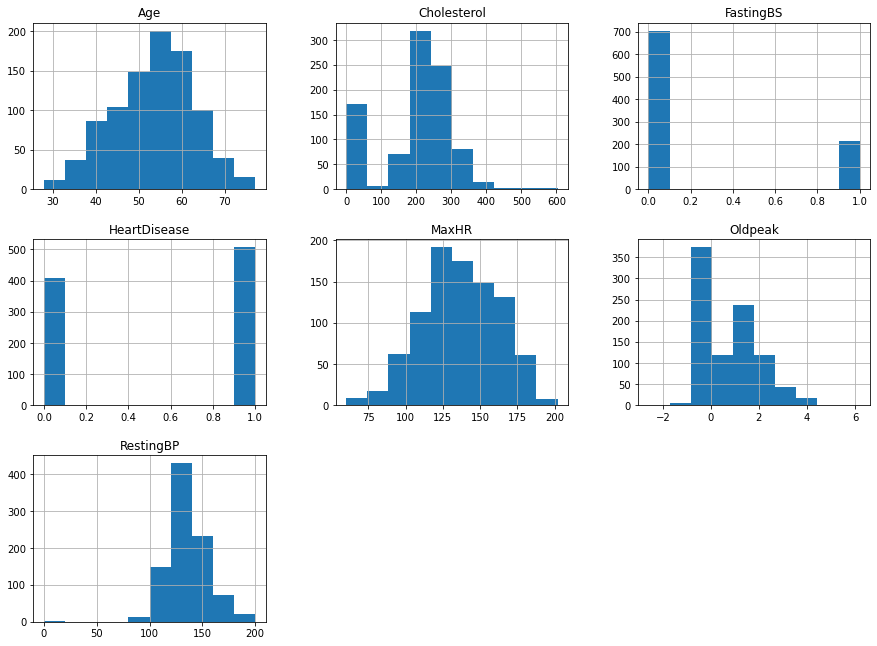

In [5]:
df.hist(figsize=(15,15),layout=(4,3))

These histograms allow us to see the distributions of each attribute. This can help us later if we needed to scale the data for example, as we will want to know if attributes are Gaussian or not.

## Checking correlation

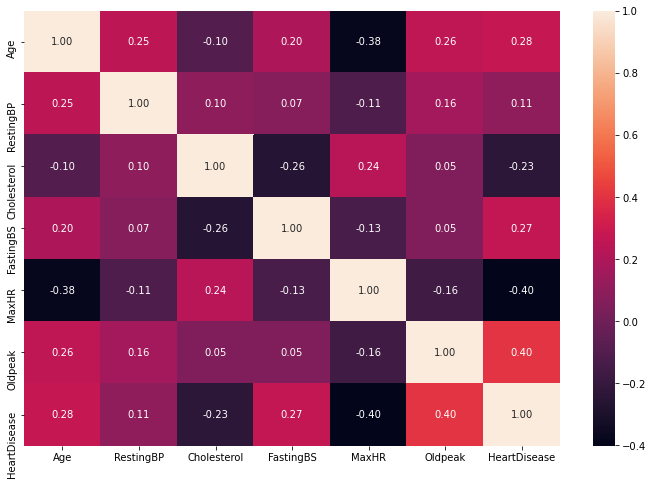

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

The correlations show that heart disease isn't strongly correlated with any 1 variable but of the variables Max Heart Rate and ST depression induced by exercise relative to rest.

## Dealing with non-numeric data

In [7]:
df = pd.get_dummies(df, columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

This allows us to separate non-numeric categorical data into separate columns containing binary values indicating if the variable is true or false. For example, under the Sex column we initally had Male and Female, but now we have a column for Male and a column for Female and if a row previously described a Male patient, it would now contain a 1 in the Male column, and a 0 in the Female column.

In [8]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


## Data scaling

In [9]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

We now need to scale the data so it sits within the same range, as before we had attributes such as Cholesterol with values in the 100's and binary attributes with ranges of 0 to 1. We scale the data as we don't want the algorithms to place more importance on these attributes with large values simply because they have large values.

In [10]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


## Outlier Detection

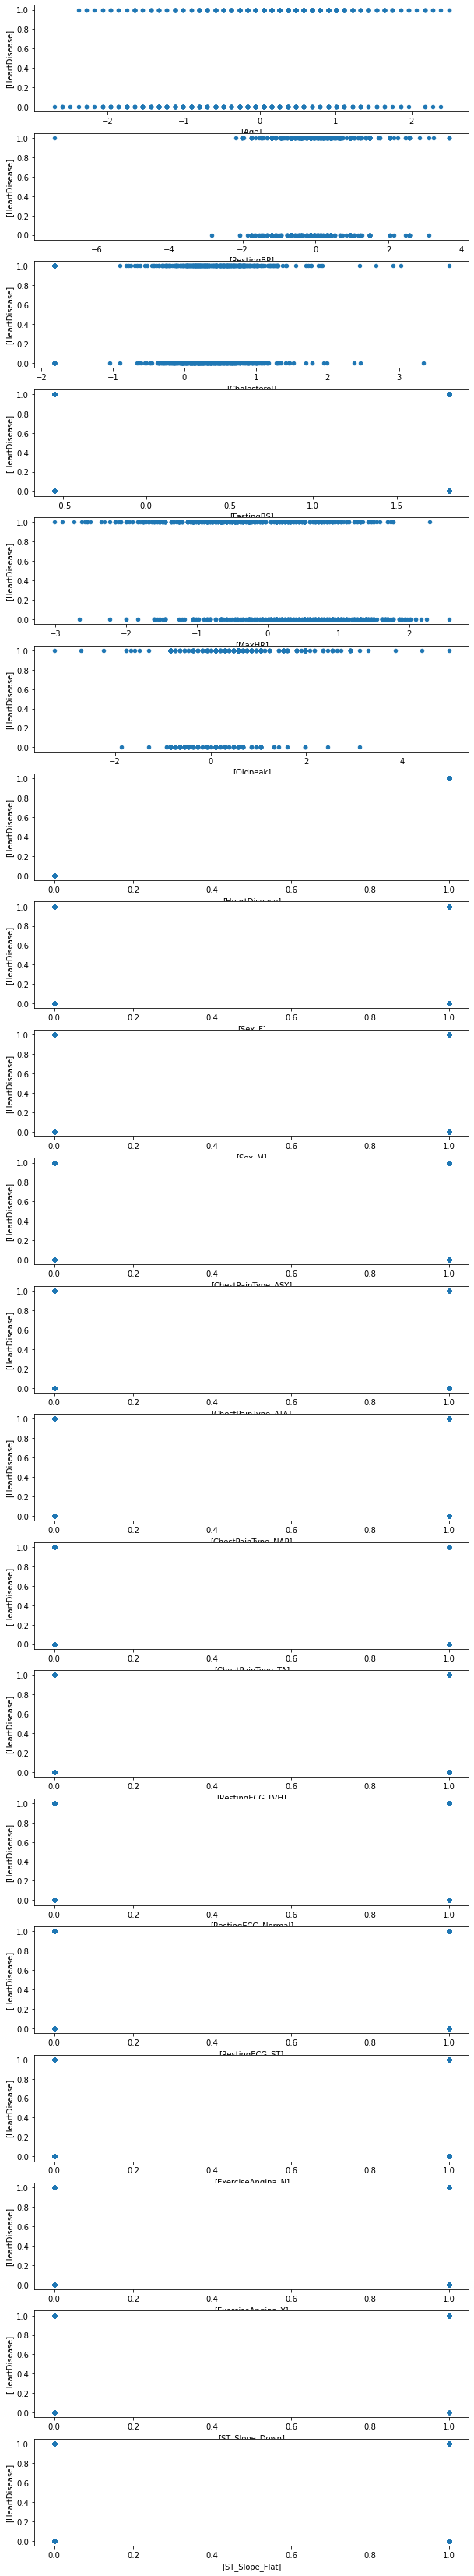

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(df.columns.values)-1, 1)

for i, col in enumerate(df.columns.values[:-1]):
    df.plot(x=[col], y=['HeartDisease'], kind="scatter", ax=axes[i], figsize=(10,60))

plt.show()

Plotting each attribute with respect to Heart Disease can help us find any values which would be considered outliers which we could then remove.

# 2. Implementation

## Loading the models

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

knn = KNeighborsRegressor()
lr = LogisticRegression()
svm = SVC()
mlp = MLPClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()

We'll start off by loading in the models we will be using. For this task I have chosen to use a K-Nearest Neighbours, Logistic Regression, Support Vector Machine, Multi-Layer Peceptron Neural Network, Random Forest, Gradient Boosting Classifier and Adaptive Boosting Classifier.

## Initial Results

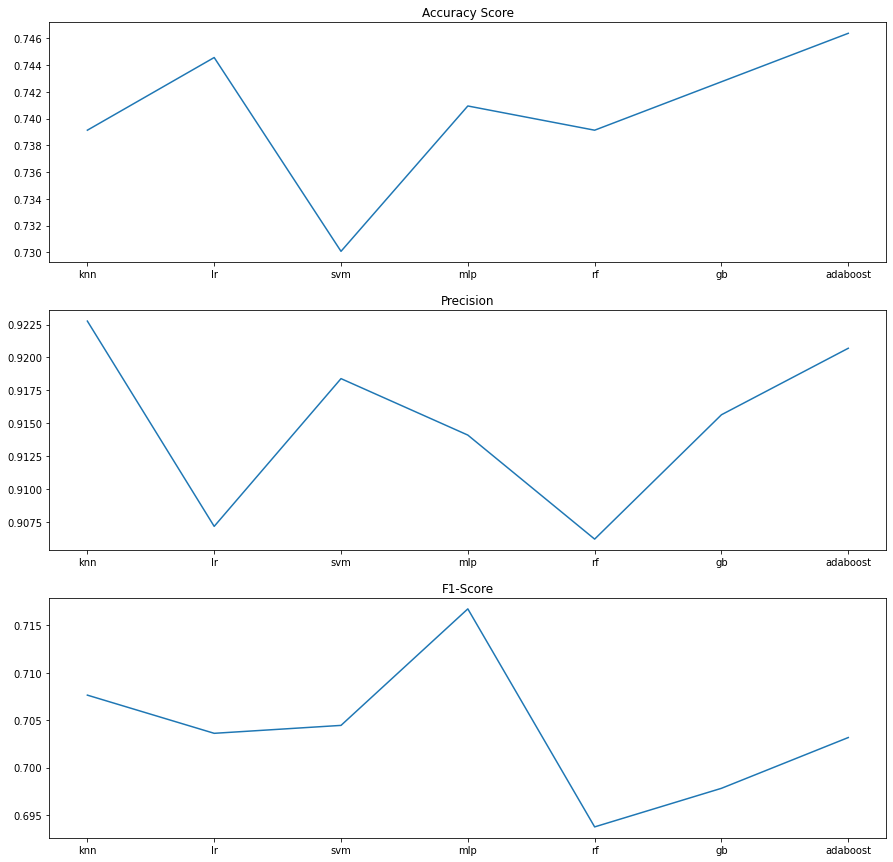

In [26]:
import random
from statistics import mean, median
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score, f1_score

models = [knn,lr,svm,mlp,rf,gb,adaboost]
model_names = ['knn','lr','svm','mlp','rf','gb','adaboost']
rows = [i for i in range(3)]
fig,ax = plt.subplots(3,figsize=(15,15))

for row in rows:
    count = 0
    model_dict = dict.fromkeys(['knn','lr','svm','mlp','rf','gb','adaboost'])
    for classifier in models:
        accuracy = []
        precision = []
        fscore = []
        for i in range(20):
            X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['HeartDisease']), df['HeartDisease'], test_size=0.3, random_state=random.randint(0, 100))
            model = knn.fit(X_train,y_train)
            y_pred = model.predict(X_test)

            y_pred = [int(pred) for pred in y_pred]
            y_test = [int(test) for test in y_test]
            
            accuracy.append(accuracy_score(y_test, y_pred))
            precision.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[0][1])
            fscore.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[2][1])
        
        if row==0:
            model_dict[model_names[count]]=median(accuracy)
            title = 'Accuracy Score'
        elif row==1:
            model_dict[model_names[count]]=median(precision)
            title = 'Precision'
        else:
            model_dict[model_names[count]]=median(fscore)
            title = 'F1-Score'
    
        count += 1
        
    ax[row].plot(model_names,list(model_dict.values()))
    ax[row].set_title(title)

I chose 3 metrics which I believed were the most important for this task: Accuracy, Precision and F1-score. The reason I chose accuracy is because it a basic way of describing how well the model predicts for heart disease. I chose precision because accuracy by itself can be misleading for this task as we may have a model which is very accurate because it predicts patients without heart disease very well but is less good at predicting patients with heart disease. In most medical cases it is better to produce a false positive (saying you have the disease when you don't) rather than a false negative (saying you don't have the disease when you do) as an undetected disease can pose a threat to life. The Precision here tells us out of all the positive predictions (there is heart disease) how many are correct. Finally the F1-score is a balance between precision and recall and so is another very useful metric for this task.

# 3. Optimization

In [14]:
neighbours = [(2*n)+1 for n in range(100)]
neighbour_accuracy = dict.fromkeys(neighbours)
neighbour_precision = dict.fromkeys(neighbours)
neighbour_fscore = dict.fromkeys(neighbours)

for n in neighbours:
    knn = KNeighborsRegressor(n_neighbors=n)
    accuracy = []
    precision = []
    fscore = []
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['HeartDisease']), df['HeartDisease'], test_size=0.3, random_state=42)
        model = knn.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        y_pred = [int(pred) for pred in y_pred]
        y_test = [int(test) for test in y_test]
        
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[0][1])
        fscore.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[2][1])
    
    neighbour_accuracy[n]=(median(accuracy))
    neighbour_precision[n]=(median(precision))
    neighbour_fscore[n]=(median(fscore))
    
n_accuracy = max(neighbour_accuracy, key=neighbour_accuracy.get)
n_precision = max(neighbour_precision, key=neighbour_precision.get)
n_fscore = max(neighbour_fscore, key=neighbour_fscore.get)

print('The greatest accuracy of {} was achieved with {} neighbours'.format(neighbour_accuracy[n_accuracy],n_accuracy))
print('The greatest precision of {} was achieved with {} neighbours'.format(neighbour_precision[n_precision],n_precision))
print('The greatest F-score of {} was achieved with {} neighbours'.format(neighbour_fscore[n_fscore],n_fscore))

The greatest accuracy of 0.8297101449275363 was achieved with 1 neighbours
The greatest precision of 1.0 was achieved with 15 neighbours
The greatest F-score of 0.8535825545171339 was achieved with 1 neighbours


In [15]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# penalties = [‘l1’, ‘l2’, ‘elasticnet’, ‘none’]
solver_accuracy = dict.fromkeys(solvers)
solver_precision = dict.fromkeys(solvers)
solver_fscore = dict.fromkeys(solvers)

for solver in solvers:
    lr = LogisticRegression(solver=solver)
    accuracy = []
    precision = []
    fscore = []
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['HeartDisease']), df['HeartDisease'], test_size=0.33, random_state=42)
        model = lr.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        y_pred = [int(pred) for pred in y_pred]
        y_test = [int(test) for test in y_test]

        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[0][1])
        fscore.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[2][1])

    solver_accuracy[solver]=(median(accuracy))
    solver_precision[solver]=(median(precision))
    solver_fscore[solver]=(median(fscore))
    
s_accuracy = max(solver_accuracy, key=solver_accuracy.get)
s_precision = max(solver_precision, key=solver_precision.get)
s_fscore = max(solver_fscore, key=solver_fscore.get)

print('The greatest accuracy of {} was achieved with a {} solver'.format(solver_accuracy[s_accuracy],s_accuracy))
print('The greatest precision of {} was achieved with a {} solver'.format(solver_precision[s_precision],s_precision))
print('The greatest F-score of {} was achieved with a {} solver'.format(solver_fscore[s_fscore],s_fscore))

C:\Users\jamar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jamar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jamar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jamar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jamar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jamar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

The greatest accuracy of 0.8811881188118812 was achieved with a newton-cg solver
The greatest precision of 0.9337349397590361 was achieved with a newton-cg solver
The greatest F-score of 0.8959537572254335 was achieved with a newton-cg solver


In [16]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

kernel_accuracy = dict.fromkeys(kernels)
kernel_precision = dict.fromkeys(kernels)
kernel_fscore = dict.fromkeys(kernels)

for kernel in kernels:
    svm = SVC(kernel=kernel)
    accuracy = []
    precision = []
    fscore = []
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['HeartDisease']), df['HeartDisease'], test_size=0.33, random_state=42)
        model = svm.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        y_pred = [int(pred) for pred in y_pred]
        y_test = [int(test) for test in y_test]

        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[0][1])
        fscore.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[2][1])

    kernel_accuracy[kernel]=(median(accuracy))
    kernel_precision[kernel]=(median(precision))
    kernel_fscore[kernel]=(median(fscore))
    
k_accuracy = max(kernel_accuracy, key=kernel_accuracy.get)
k_precision = max(kernel_precision, key=kernel_precision.get)
k_fscore = max(kernel_fscore, key=kernel_fscore.get)

print('The greatest accuracy of {} was achieved with a {} solver'.format(kernel_accuracy[k_accuracy],k_accuracy))
print('The greatest precision of {} was achieved with a {} solver'.format(kernel_precision[k_precision],k_precision))
print('The greatest F-score of {} was achieved with a {} solver'.format(kernel_fscore[k_fscore],k_fscore))

The greatest accuracy of 0.8745874587458746 was achieved with a linear solver
The greatest precision of 0.9329268292682927 was achieved with a linear solver
The greatest F-score of 0.8932584269662921 was achieved with a rbf solver


In [17]:
activation = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']
alphafloat = [10**i for i in range(-5,1)]
learning_rate = ['constant', 'invscaling', 'adaptive']

params_accuracy = {}
params_precision = {}
params_fscore = {}

for act in activation:
    for solver in solvers:
        for alpha in alphafloat:
            for rate in learning_rate:
                mlp = MLPClassifier(activation=act,solver=solver,alpha=alpha,learning_rate=rate)
                accuracy = []
                precision = []
                fscore = []
                key = act+solver+str(alpha)+rate
                for i in range(50):
                    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['HeartDisease']), df['HeartDisease'], test_size=0.33, random_state=42)
                    model = svm.fit(X_train,y_train)
                    y_pred = model.predict(X_test)

                    y_pred = [int(pred) for pred in y_pred]
                    y_test = [int(test) for test in y_test]

                    accuracy.append(accuracy_score(y_test, y_pred))
                    precision.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[0][1])
                    fscore.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[2][1])

                params_accuracy[key]=(median(accuracy))
                params_precision[key]=(median(precision))
                params_fscore[key]=(median(fscore))
    
param_accuracy = max(params_accuracy, key=params_accuracy.get)
param_precision = max(params_precision, key=params_precision.get)
param_fscore = max(params_fscore, key=params_fscore.get)

print('The greatest accuracy of {} was achieved with key {}'.format(params_accuracy[param_accuracy],param_accuracy))
print('The greatest precision of {} was achieved with key {}'.format(params_precision[param_precision],param_precision))
print('The greatest F-score of {} was achieved with key {}'.format(params_fscore[param_fscore],param_fscore))

The greatest accuracy of 0.7920792079207921 was achieved with key identitylbfgs1e-05constant
The greatest precision of 0.8545454545454545 was achieved with key identitylbfgs1e-05constant
The greatest F-score of 0.817391304347826 was achieved with key identitylbfgs1e-05constant


In [18]:
n_estimators = [i for i in range(10,200)]
criterion = ['gini', 'entropy']

params_accuracy = {}
params_precision = {}
params_fscore = {}

for num_trees in n_estimators:
    for criteria in criterion:
        rf = RandomForestClassifier(n_estimators=num_trees,criterion=criteria)
        accuracy = []
        precision = []
        fscore = []
        key = str(num_trees)+criteria
        for i in range(50):
            X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['HeartDisease']), df['HeartDisease'], test_size=0.33, random_state=42)
            model = rf.fit(X_train,y_train)
            y_pred = model.predict(X_test)

            y_pred = [int(pred) for pred in y_pred]
            y_test = [int(test) for test in y_test]

            accuracy.append(accuracy_score(y_test, y_pred))
            precision.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[0][1])
            fscore.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[2][1])

        params_accuracy[key]=(median(accuracy))
        params_precision[key]=(median(precision))
        params_fscore[key]=(median(fscore))
    
param_accuracy = max(params_accuracy, key=params_accuracy.get)
param_precision = max(params_precision, key=params_precision.get)
param_fscore = max(params_fscore, key=params_fscore.get)

print('The greatest accuracy of {} was achieved with key {}'.format(params_accuracy[param_accuracy],param_accuracy))
print('The greatest precision of {} was achieved with key {}'.format(params_precision[param_precision],param_precision))
print('The greatest F-score of {} was achieved with key {}'.format(params_fscore[param_fscore],param_fscore))

The greatest accuracy of 0.8778877887788779 was achieved with key 119entropy
The greatest precision of 0.926829268292683 was achieved with key 12entropy
The greatest F-score of 0.8939828080229226 was achieved with key 193entropy


In [19]:
loss = ['deviance', 'exponential']
learning_rate = [10**i for i in range(-5,1)]
n_estimators = [5*i for i in range(1,40)]
criterion = ['friedman_mse', 'squared_error']

params_accuracy = {}
params_precision = {}
params_fscore = {}

for l in loss:
    for rate in learning_rate:
        for num_trees in n_estimators:
            for criteria in criterion:
                gb = GradientBoostingClassifier(loss=l, learning_rate = rate, n_estimators=num_trees, criterion=criteria)
                accuracy = []
                precision = []
                fscore = []
                key = l+str(rate)+str(num_trees)+criteria
                for i in range(50):
                    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['HeartDisease']), df['HeartDisease'], test_size=0.33, random_state=42)
                    model = gb.fit(X_train,y_train)
                    y_pred = model.predict(X_test)

                    y_pred = [int(pred) for pred in y_pred]
                    y_test = [int(test) for test in y_test]

                    accuracy.append(accuracy_score(y_test, y_pred))
                    precision.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[0][1])
                    fscore.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[2][1])

                params_accuracy[key]=(median(accuracy))
                params_precision[key]=(median(precision))
                params_fscore[key]=(median(fscore))
    
param_accuracy = max(params_accuracy, key=params_accuracy.get)
param_precision = max(params_precision, key=params_precision.get)
param_fscore = max(params_fscore, key=params_fscore.get)

print('The greatest accuracy of {} was achieved with key {}'.format(params_accuracy[param_accuracy],param_accuracy))
print('The greatest precision of {} was achieved with key {}'.format(params_precision[param_precision],param_precision))
print('The greatest F-score of {} was achieved with key {}'.format(params_fscore[param_fscore],param_fscore))

The greatest accuracy of 0.8679867986798679 was achieved with key deviance0.130friedman_mse
The greatest precision of 0.930379746835443 was achieved with key deviance0.170friedman_mse
The greatest F-score of 0.8837209302325582 was achieved with key deviance0.130friedman_mse


In [22]:
algorithm = ['SAMME', 'SAMME.R']
learning_rate = [10**i for i in range(-5,1)]
n_estimators = [i for i in range(10,200)]

params_accuracy = {}
params_precision = {}
params_fscore = {}

for alg in algorithm:
    for rate in learning_rate:
        for num_trees in n_estimators:
            adaboost = AdaBoostClassifier(n_estimators=num_trees, learning_rate=rate, algorithm=alg)
            accuracy = []
            precision = []
            fscore = []
            key = alg+str(rate)+str(num_trees)
            for i in range(50):
                X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['HeartDisease']), df['HeartDisease'], test_size=0.33, random_state=42)
                model = adaboost.fit(X_train,y_train)
                y_pred = model.predict(X_test)

                y_pred = [int(pred) for pred in y_pred]
                y_test = [int(test) for test in y_test]

                accuracy.append(accuracy_score(y_test, y_pred))
                precision.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[0][1])
                fscore.append(precision_recall_fscore_support(y_test, y_pred,zero_division=0)[2][1])

            params_accuracy[key]=(median(accuracy))
            params_precision[key]=(median(precision))
            params_fscore[key]=(median(fscore))
    
param_accuracy = max(params_accuracy, key=params_accuracy.get)
param_precision = max(params_precision, key=params_precision.get)
param_fscore = max(params_fscore, key=params_fscore.get)

print('The greatest accuracy of {} was achieved with key {}'.format(params_accuracy[param_accuracy],param_accuracy))
print('The greatest precision of {} was achieved with key {}'.format(params_precision[param_precision],param_precision))
print('The greatest F-score of {} was achieved with key {}'.format(params_fscore[param_fscore],param_fscore))

The greatest accuracy of 0.8844884488448845 was achieved with key SAMME119
The greatest precision of 0.9447852760736196 was achieved with key SAMME165
The greatest F-score of 0.899135446685879 was achieved with key SAMME119


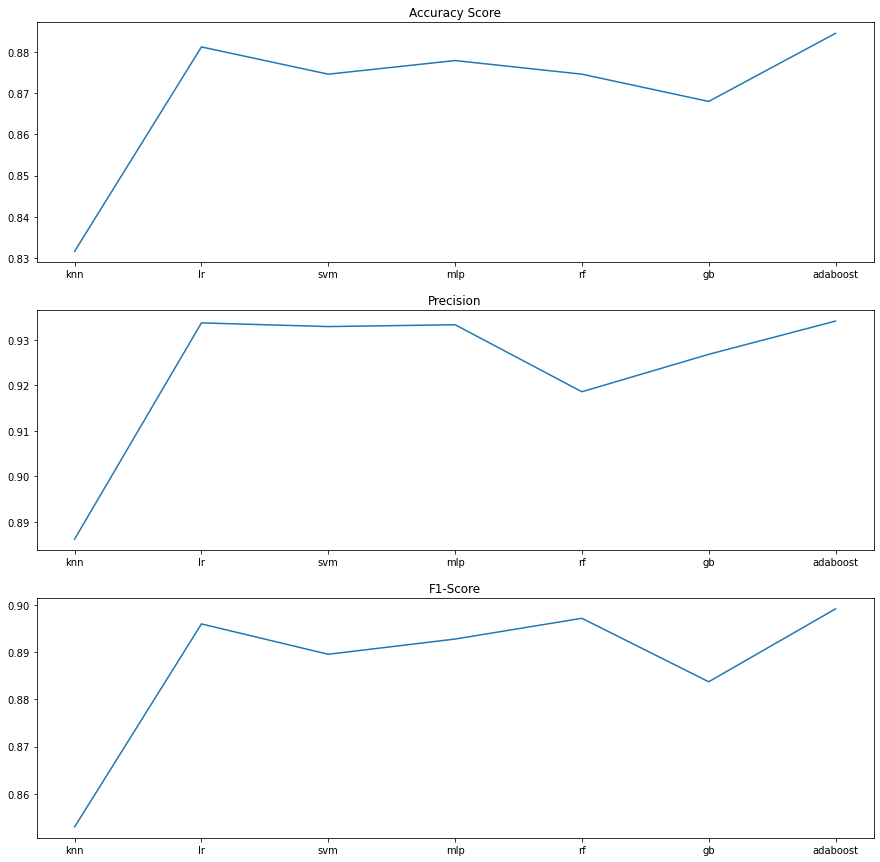

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score, f1_score

knn = KNeighborsRegressor(n_neighbors=1)
lr = LogisticRegression(solver='newton-cg')
svm = SVC(kernel='linear')
mlp = MLPClassifier(activation='identity',solver='lbfgs',alpha=1e-05,learning_rate='constant')
rf = RandomForestClassifier(n_estimators=119, criterion='entropy')
gb = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.1, n_estimators = 30, criterion = 'friedman_mse')
adaboost = AdaBoostClassifier(algorithm ='SAMME', learning_rate = 1, n_estimators = 19)

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['HeartDisease']), df['HeartDisease'], test_size=0.33, random_state=42)

models = [knn,lr,svm,mlp,rf,gb,adaboost]
model_names = ['knn','lr','svm','mlp','rf','gb','adaboost']
rows = [i for i in range(3)]
fig,ax = plt.subplots(3,figsize=(15,15))

for row in rows:
    count = 0
    model_dict = dict.fromkeys(['knn','lr','svm','mlp','rf','gb','adaboost'])
    for classifier in models:
        model = classifier.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        y_pred = [int(pred) for pred in y_pred]
        y_test = [int(test) for test in y_test]
        
        if row==0:
            model_dict[model_names[count]]=accuracy_score(y_test, y_pred)
            title = 'Accuracy Score'
        elif row==1:
            model_dict[model_names[count]]=precision_recall_fscore_support(y_test, y_pred)[0][1]
            title = 'Precision'
        else:
            model_dict[model_names[count]]=precision_recall_fscore_support(y_test, y_pred)[2][1]
            title = 'F1-Score'
    
        count += 1
        
    ax[row].plot(model_names,list(model_dict.values()))
    ax[row].set_title(title)

For each model I ran many different parameter values and ran each set of parameters multiple times and found the median of these values. I then found of these medians which was the best (for the metrics chosen the highest value is the best) and found which parameter settings produced these results.

## Discussion

As we can see the optimization process has improved the performance of each model on all 3 metrics. Overall, the Adaptive Boosting seems to produce the best results in all 3 metrics.